In [1]:
%load_ext autoreload
%autoreload 2

from fastai.vision import *
from fastai.metrics import error_rate
import numpy as np

os.chdir('../')
from src import models

In [2]:
os.getcwd()

'/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction'

## Using my custom FastAI model class

data/Histology/200X/train_fastAI_fft
data/Histology/200X/train_fastAI_fft ['benign', 'malignant']
benign


malignant


epoch,train_loss,valid_loss,error_rate,time
0,1.193229,1.473960,0.602015,06:23
1,1.084342,0.750704,0.367758,06:55
2,0.963760,0.687391,0.314861,06:50
3,0.856400,0.675539,0.377834,06:40


data/Histology/400X/train_fastAI_fft
data/Histology/400X/train_fastAI_fft ['benign', 'malignant']
benign


malignant


epoch,train_loss,valid_loss,error_rate,time
0,1.212435,3.632062,0.713092,05:56
1,1.118923,0.755485,0.342618,06:04
2,1.007523,0.720417,0.406685,06:38
3,0.921740,0.687293,0.389972,07:23


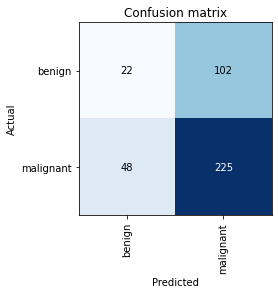

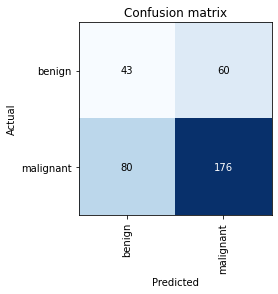

In [3]:
# Run on Histology data
mag = ['200X', '400X']
learners = []
confusions = []
predictions_all = []

def get_predictions(path, model):
    image_paths = [os.path.join(path,f) for f in os.listdir(path)]
    predictions = [model.predict_image(img) for img in image_paths]
 
    return predictions

for m in mag:
    train_path = f'data/Histology/{m}/train_fastAI_fft'
    test_path = f'data/Histology/{m}/test/test_fft'
    print(train_path)
    
    model = models.FastAI(train_path)
    print(model.path, model.classes)
    
    model.verify_images(500)
    model.fit(f'fastai_fft_{m}')    
    
    # Val Metrics
    confusions.append(model.confusion_matrix())
    
    # Test predictions
    predictions_all.append(get_predictions(test_path, model))


## Mammogram Data

data/Mammograms/fastAI/train
data/Mammograms/fastAI/train ['cancer', 'normal']
cancer


normal


epoch,train_loss,valid_loss,error_rate,time
0,0.537423,0.445829,0.141844,03:11
1,0.345472,0.108022,0.042553,03:17
2,0.254432,0.020038,0.004728,03:10
3,0.187462,0.018276,0.004728,03:12


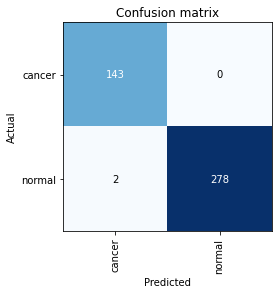

In [11]:
# Run on Mammogram data
predictions_all = []

def get_predictions(path, model):
    image_paths = [os.path.join(path,f) for f in os.listdir(path)]
    predictions = [model.predict_image(img) for img in image_paths]
 
    return predictions


train_path = f'data/Mammograms/fastAI/train'
test_path = f'data/Mammograms/fastAI/test/'
print(train_path)
    
model = models.FastAI(train_path)
print(model.path, model.classes)
    
model.verify_images(500)
model.fit(f'fastai_MLO_CC')    
    
# Val Metrics
model.confusion_matrix()
    
# Test predictions
predictions_all.append(get_predictions(test_path, model))


In [12]:
predictions_all

[[(Category tensor(0), tensor(0), tensor([0.5111, 0.4889])),
  (Category tensor(1), tensor(1), tensor([5.0310e-04, 9.9950e-01])),
  (Category tensor(0), tensor(0), tensor([0.9838, 0.0162])),
  (Category tensor(0), tensor(0), tensor([0.9978, 0.0022])),
  (Category tensor(1), tensor(1), tensor([0.1094, 0.8906])),
  (Category tensor(1), tensor(1), tensor([5.4841e-05, 9.9995e-01])),
  (Category tensor(1), tensor(1), tensor([4.4976e-04, 9.9955e-01])),
  (Category tensor(0), tensor(0), tensor([9.9999e-01, 1.4746e-05])),
  (Category tensor(0), tensor(0), tensor([9.9992e-01, 8.3026e-05])),
  (Category tensor(0), tensor(0), tensor([9.9999e-01, 1.1331e-05])),
  (Category tensor(0), tensor(0), tensor([1.0000e+00, 8.5956e-10])),
  (Category tensor(1), tensor(1), tensor([0.0053, 0.9947])),
  (Category tensor(1), tensor(1), tensor([0.0157, 0.9843])),
  (Category tensor(0), tensor(0), tensor([1.0000e+00, 2.7016e-07])),
  (Category tensor(0), tensor(0), tensor([0.9983, 0.0017])),
  (Category tensor(0)

In [6]:
image_paths

NameError: name 'image_paths' is not defined

In [40]:
path = Path('data/Histology/40X/train_fastAI')
model = models.FastAI(path)
model.path, model.classes

(PosixPath('data/Histology/100X/train_fastAI'), ['benign', 'malignant'])

In [41]:
model.verify_images(500)

benign


malignant


'done'

In [42]:
learner = model.fit('fastai-test')

epoch,train_loss,valid_loss,error_rate,time
0,0.828693,0.364510,0.141119,03:19
1,0.598147,0.300704,0.097324,03:28
2,0.467343,0.220554,0.072993,03:24
3,0.373331,0.210536,0.072993,03:24


Learner(data=ImageDataBunch;

Train: LabelList (1646 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
benign,benign,benign,benign,benign
Path: data/Histology/100X/train_fastAI;

Valid: LabelList (411 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
benign,malignant,malignant,malignant,malignant
Path: data/Histology/100X/train_fastAI;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1):

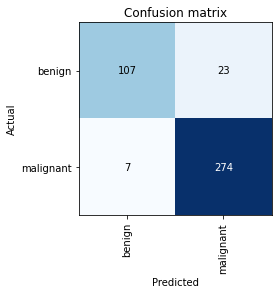

In [43]:
model.confusion_matrix()

In [47]:
model.predict_image('data/Histology/100X/test/test/SOB_M_DC-14-2980-100-006.png')

(['benign', 'malignant'],
 (Category tensor(1), tensor(1), tensor([3.9634e-04, 9.9960e-01])))

In [50]:
model.learning_rate()

AttributeError: 'Learner' object has no attribute 'lrs'

## The long way

In [5]:
path = Path('data/Histology/100X/train_fastAI')

In [6]:
# Go through folder, resize anything larger than 500 pix
for folder in ['benign', 'malignant']:
    print(folder)
    verify_images(path/folder, delete=True, max_size=500)

benign


malignant


In [7]:
# Set up validation percent
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                 ds_tfms=get_transforms(), size=224, 
                                  num_workers=4).normalize(imagenet_stats)
# Check things
print(data.classes)
data.show_batch(rows=3)

In [21]:
## Start training
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

# Fit some data
defaults.device = torch.device('cuda')
learn.fit_one_cycle(4)

In [33]:
# Save things and find learning rate
learn.save('histology_100x_v1')
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


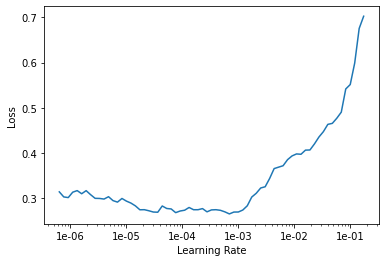

In [38]:
# Plot learning rate
learn.recorder.plot()

In [ ]:
# Confusion matrix on validation set
metric = ClassificationInterpretation.from_learner(learn)
metric.plot_confusion_matrix()

In [ ]:
# Predict single image by turning it into ItemBase and putting into predict function
path = 'data/Histology/100X/test/test/SOB_M_MC-14-13413-100-035.png'
image = open_image(path)
#data = ItemBase(path)
learn.predict(image)